In [201]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [198]:
def parser(x):
  return datetime.strptime(x, '%m/%d/%Y')
data = pd.read_csv("/content/sample_data/london_all_count_dataset.csv", index_col=0, parse_dates=[0], date_parser=parser)
data.head()

,y
ds,
2018-10-01,16
2018-10-02,17
2018-10-03,13
2018-10-04,11
2018-10-05,15


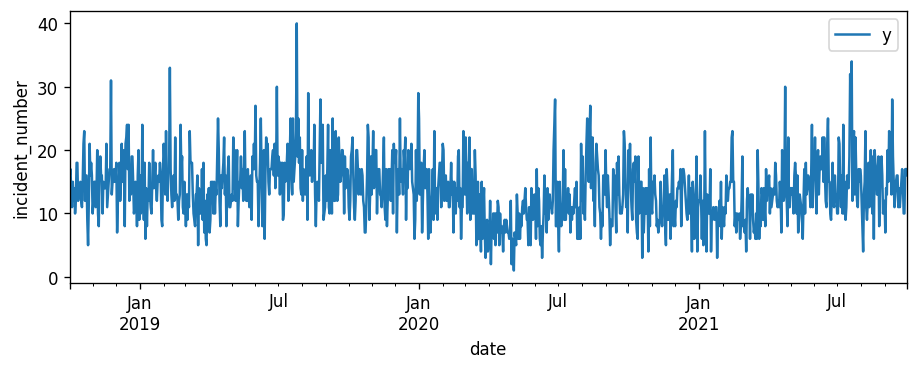

In [205]:
data.plot()
plt.xlabel("date")
plt.ylabel("incident_number")
plt.show()

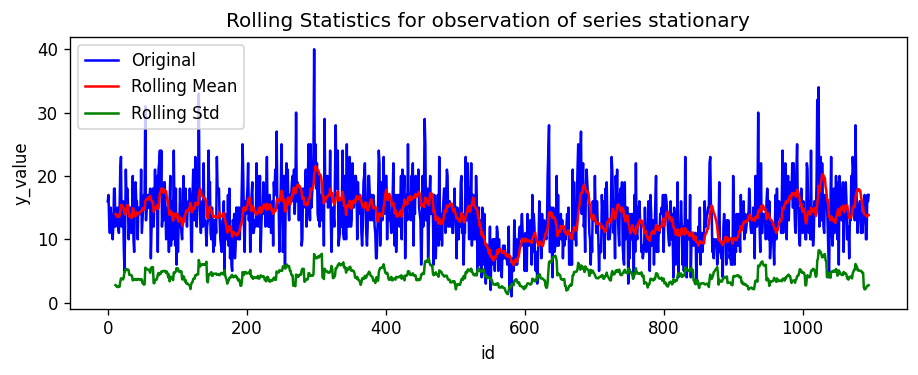

In [199]:
roll_mean = df.y.rolling(window=12).mean()
roll_std = df.y.rolling(window=12).std()
# roll_variance = time_series_datas.rolling(window=12).var()
plt.plot(df.y, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='green', label='Rolling Std')
# plt.plot(roll_variance,color='yellow',label='Rolling Variance')

plt.legend(loc='best')
plt.ylabel("y_value")
plt.xlabel("id")
plt.title('Rolling Statistics for observation of series stationary')
plt.show(block=False)

## ADF TEST for stationarity of time seriers

In [206]:
#if p value less than 0.05, indicate that the series is stationary
from statsmodels.tsa.stattools import adfuller
# ADF Test
result = adfuller(df.y.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.5874030492998874
p-value: 0.006006471705485018
Critial Values:
   1%, -3.4364476591811033
Critial Values:
   5%, -2.864232347211692
Critial Values:
   10%, -2.5682035004867494


# Stationary: means mean, variance and covariance is constant over period of time

In [214]:
from statsmodels.graphics.tsaplots import plot_acf

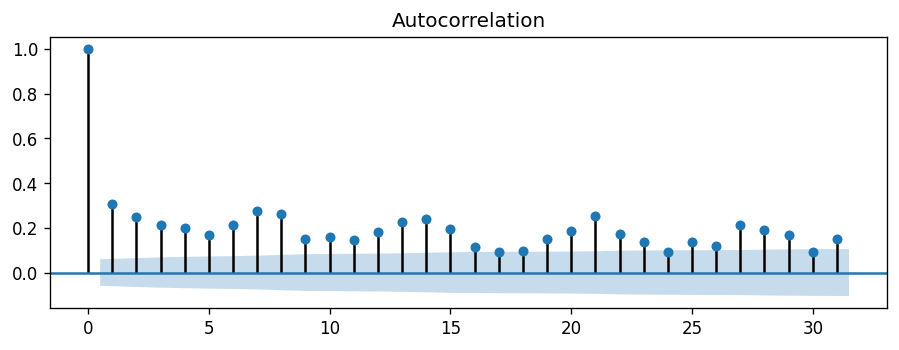

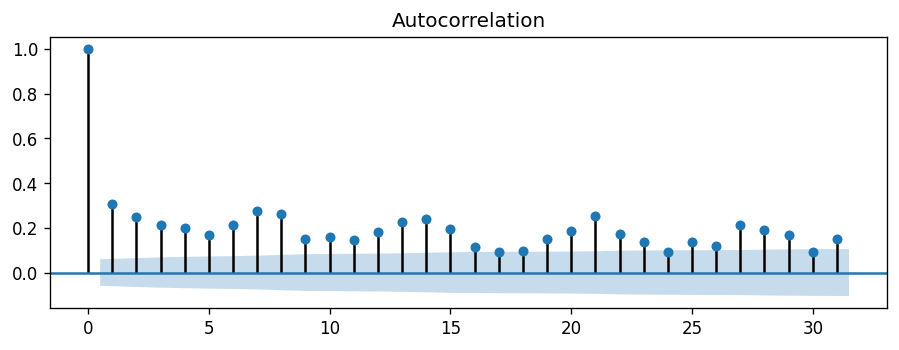

In [215]:
plot_acf(data)

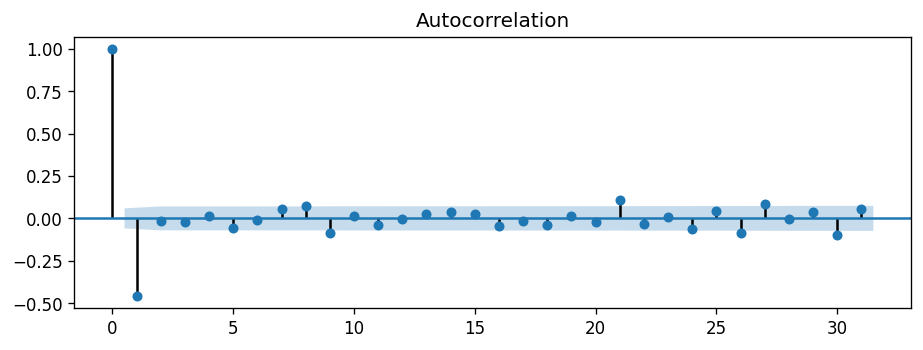

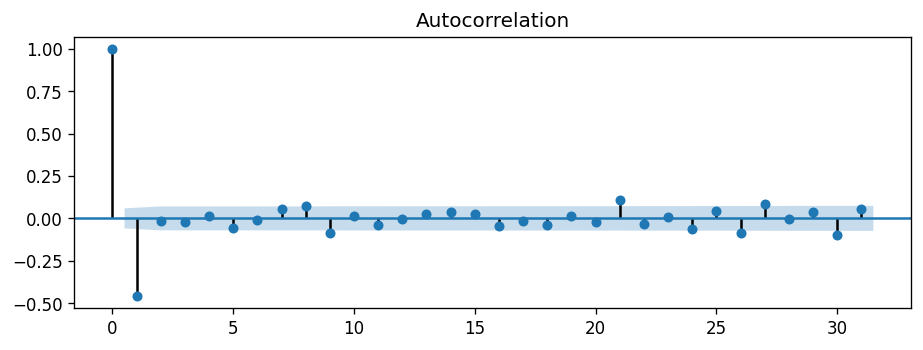

In [217]:
data_diff = data.diff(periods=1)[1:]
plot_acf(data_diff)

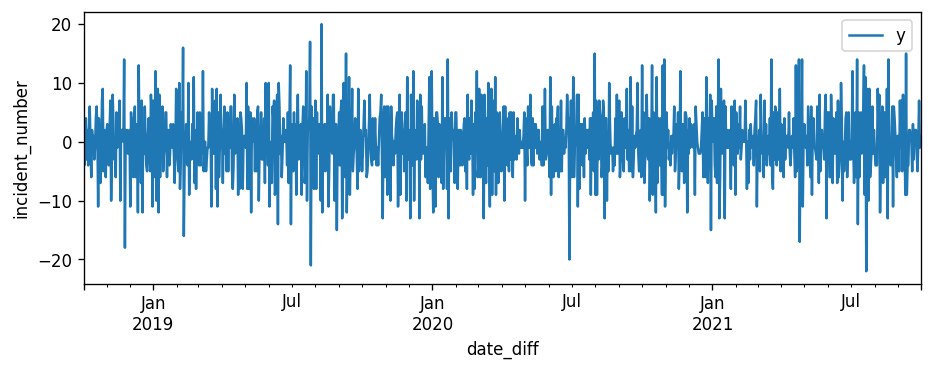

In [219]:
data_diff.plot()
plt.xlabel("date_diff")
plt.ylabel("incident_number")
plt.show()

### AR model 

In [225]:
X = data.values
train = X[0:1004]
test = X[1004:]
predictions = []
X.size

1096

In [245]:
from statsmodels.tsa.arima_model import AR 
from sklearn.metrics import mean_absolute_error

# 1,1,2 ARIMA Model
model = AR(train)
model_fit = model.fit() 

In [246]:
predictions = model_fit.predict(start=1004, end=1096)

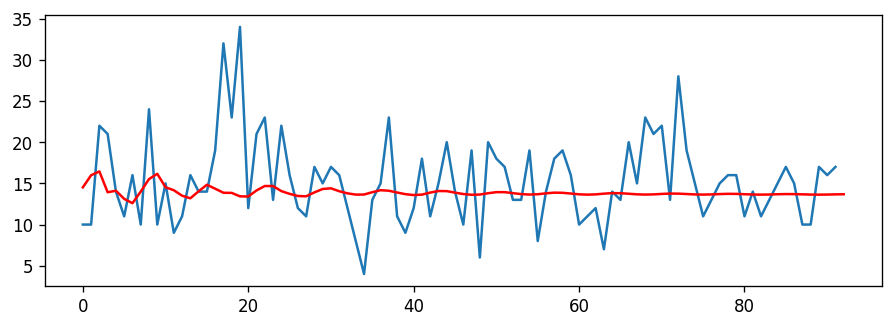

In [247]:

plt.plot(test)
plt.plot(predictions, color='red')

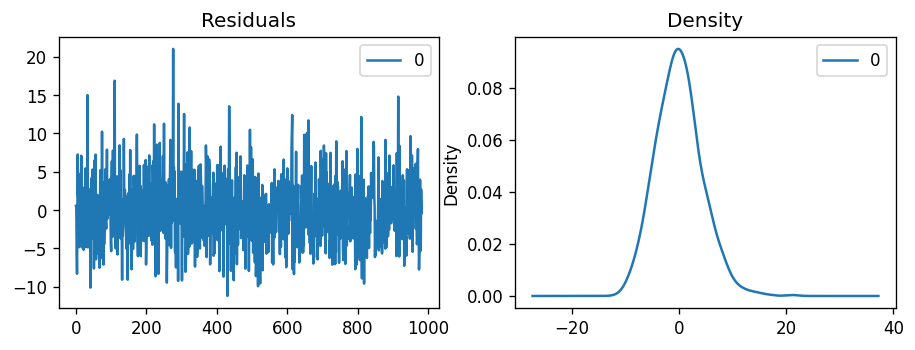

In [248]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()